# Indeed Job Analysis

## Imports

In [135]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn

# only run below once
#import nltk
#nltk.download("punkt")
#nltk.download("stopwords")

## Load data

In [104]:
# load all files into one dataframe
folder_path = "/Users/jan/Documents/7.Semester/Datenanalyse in der Praxis/SeminarArbeit/Data"
os.chdir(folder_path)
All_CSVs=[]
for file in os.listdir():
    df =pd.read_csv(file, index_col=[0], header=0)
    All_CSVs.append(df)

all_jobs = pd.concat(All_CSVs, axis=0, ignore_index=True)

# drop duplicates
all_jobs = all_jobs.drop_duplicates(subset=["1","2","5"],keep="last")

# reindex
all_jobs = all_jobs.reset_index(drop=True)

# rename
all_jobs = all_jobs.rename(columns={'0': 'job_id',"1" : "job_title","2" : "company_name","3" : "company_location","4" : "type_of_job","5" : "job_description","6" : "date_info"})



In [40]:
all_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         166 non-null    object
 1   company_name      165 non-null    object
 2   company_location  48 non-null     object
 3   type_of_job       56 non-null     object
 4   job_description   166 non-null    object
 5   date_info         167 non-null    object
dtypes: object(6)
memory usage: 8.0+ KB


## Clean Data

### Clean Job Title

In [107]:
all_jobs["job_title"] =  all_jobs["job_title"].astype(str)
all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\n- job post" , "")
all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\(m/w/d\)" , "")
all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\(m/f/d\)" , "")
all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\(f/m/d\)" , "")
all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\(w/m/d\)" , "")

<ipython-input-107-4054886a64d6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\(m/w/d\)" , "")
<ipython-input-107-4054886a64d6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\(m/f/d\)" , "")
<ipython-input-107-4054886a64d6>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\(f/m/d\)" , "")
<ipython-input-107-4054886a64d6>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  all_jobs["job_title"] =  all_jobs["job_title"].str.replace("\(w/m/d\)" , "")


### Clean job_description

In [128]:
all_jobs["job_description"] =all_jobs["job_description"].astype(str)

## Job Titles

In [110]:
all_jobs.job_title.value_counts().head(10)

Data Analyst                                                  18
(Junior) Data Analyst                                          3
Pricing Data Analyst                                           2
Controlling Analyst                                            2
Data Analyst International Internal Auditing                   2
(Junior) Research Data (Insights) Analyst                      2
Data Analyst  im Controlling                                   2
Junior Data Analyst for Project and Financial Controlling      2
Werkstudent Data Analyst                                       2
Junior Data Analyst - IT / Date Science                        2
Name: job_title, dtype: int64

## Top hiring companies

In [113]:
all_jobs.company_name.value_counts().head(10)

ALDI SÜD                     4
CareerFoundry GmbH           3
Munich RE                    3
Morningstar                  2
MSR Consulting Group GmbH    2
dm-drogerie markt            2
PayFit                       2
ABOUT YOU SE & Co. KG        2
DB Schenker                  2
Deutsche Bahn AG             2
Name: company_name, dtype: int64

# Analysis

In [115]:
# keyword to search for
keywords = ["excel" , "python" , "r" ,"matlab", "ai", "ki", "mysql" , "linux", "c",
            "visio", "java", "javascript", "vba", "powerpoint", "github", "git", "gitlab",
            "sql", "mysql", "sqlight"]

### Tokenize description

In [129]:
# create new column for tokens
all_jobs["tokenized_description"] = ""
# iterate over rows
for index, row in all_jobs.iterrows():
    # lower all words
    description = row.job_description.lower()
    
    # tokenize description
    description = word_tokenize(description)
    
    # remove duplicates
    description = list(set(description))
    
    # remove stopwords etc (english)
    description = [word for word in description if word not in stopwords.words("english")]
    
    # remove stopwords etc (german)
    description = [word for word in description if word not in stopwords.words("german")]
    
    # add to new "tokenized_description" column
    row.tokenized_description=description
    
    

### Count keywords

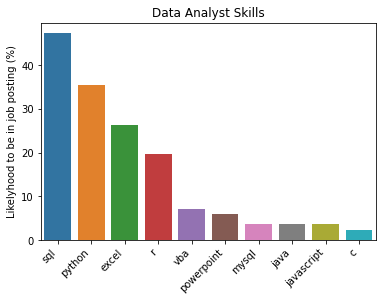

        keywords  counts  percentage
14           sql      79   47.305389
28        python      59   35.329341
57         excel      44   26.347305
107            r      33   19.760479
636          vba      12    7.185629
748   powerpoint      10    5.988024
1320       mysql       6    3.592814
1366        java       6    3.592814
1416  javascript       6    3.592814
2121           c       4    2.395210


In [139]:
#get all keywords
count_keywords=pd.DataFrame(all_jobs.tokenized_description.sum()).value_counts().rename_axis("keywords").reset_index(name="counts")
length =len(all_jobs)

count_keywords["percentage"] = 100 * count_keywords.counts / length

# plotting
count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
count_keywords = count_keywords.head(10)

graph = seaborn.barplot(x="keywords", y="percentage", data = count_keywords)
graph.set_xticklabels(graph.get_xticklabels(), 
                        rotation=45, 
                        horizontalalignment='right')
plt.xlabel("")
plt.ylabel("Likelyhood to be in job posting (%)")
plt.title("Data Analyst Skills") 
plt.show(graph)
print(count_keywords)

